In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder # ML to allow LabelEncoder model

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/HaiderrX/CISC4900-Healthcare-Dataset-Data-Analysis/refs/heads/main/healthcare_dataset.csv")

In [ ]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


# Dataset overview

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

## No Missing values

In [ ]:
df[df.isnull().any(axis=1)]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results


## Duplicate entries present

In [ ]:
df[df.duplicated()]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
50023,Samuel joYCe,56,Male,O+,Arthritis,2022-11-03,Krista Hartman,Thomas-Ballard,UnitedHealthcare,15654.830587,157,Urgent,2022-11-22,Aspirin,Inconclusive
50040,KIMBErly vasqueZ,26,Male,A-,Obesity,2023-10-23,Jennifer Bennett,Cowan Inc,UnitedHealthcare,38142.109678,313,Urgent,2023-11-18,Penicillin,Abnormal
50055,SCoTT tHOrNton,55,Female,B-,Obesity,2021-04-08,Joshua Ingram,Keller LLC,Medicare,30894.904511,455,Urgent,2021-04-15,Aspirin,Abnormal
50070,wiLliam LEe,27,Female,O+,Arthritis,2020-01-31,Lauren Montgomery,Winters-Simon,Cigna,46229.434901,153,Elective,2020-02-13,Lipitor,Normal
50078,chRistOPheR NoRrIs,38,Male,AB-,Arthritis,2023-01-14,Denise Blair,Inc Morales,Medicare,9072.127142,452,Emergency,2023-02-12,Penicillin,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55461,connOR coMPTon,63,Male,A+,Asthma,2021-08-21,Jonathan Allen,"and Willis Mullins, Bowers",Medicare,1936.702824,375,Emergency,2021-09-16,Paracetamol,Normal
55462,alYSsA mIlLER,35,Female,A-,Diabetes,2022-06-30,Ryan Price,Shelton-Gallagher,UnitedHealthcare,2210.460898,289,Elective,2022-07-27,Penicillin,Normal
55464,ChRIs huGHeS,35,Female,AB-,Obesity,2024-02-28,Katelyn Perry,Lyons-Hansen,Blue Cross,11889.154513,128,Emergency,2024-03-14,Paracetamol,Abnormal
55484,keNNEtH alvarez,80,Male,O+,Cancer,2022-05-05,Andrew Conner,Sons Mayo and,Cigna,45653.802310,114,Elective,2022-05-17,Aspirin,Normal


In [ ]:
#df[df['Name'] == "keNNEtH alvarez"]
# Sampling duplicate entries to see if there are any differences

## Dropped duplicates and verified it did

In [ ]:
df = df.drop_duplicates()

In [ ]:
df[df.duplicated()]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Room Number         54966 non-null  int64  
 11  Admission Type      54966 non-null  object 
 12  Discharge Date      54966 non-null  object 
 13  Medication          54966 non-null  object 
 14  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.7+ MB


## Fixed the 'Name' column

In [ ]:
df['Name'] = df['Name'].str.title()

## Rounded the billing column to 2 decimal places

In [ ]:
df['Billing Amount'] = df['Billing Amount'].round(2)

## Add new columns, ids or relevant columns for things that may be important for SQL or later

In [ ]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'patient_id', 'doctor_id'],
      dtype='object')

In [ ]:
df['patient_id'] = np.arange(1, len(df) + 1)

In [ ]:
df['doctor_id'] = df.groupby('Doctor').ngroup()+1

columns considering to add:

patient_id (done) (to make unique)

doctor_id (done) (to make unique)

In [ ]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,patient_id,doctor_id,treatment_days
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal,1,26613,2
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,2,33649,6
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal,3,37829,15
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal,4,22512,30
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal,5,21260,20


## Convert the admission/discharge dates from object to date/time type

In [ ]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

In [ ]:
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

In [ ]:
df['treatment_days'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df['treatment_days'] = np.maximum(1, df['treatment_days'])

In [ ]:
df['Billing Amount'].describe() # look back at this for later to see what to do with bills less than 0

,Billing Amount
count,54966.000000
mean,25544.306260
std,14208.409715
min,-2008.490000
25%,13243.722500
50%,25542.750000
75%,37819.857500
max,52764.280000


108 rows of negative billings

which is a small sample out of the big data given

choice is made to drop.

In [ ]:
df[df['Billing Amount'] < 0]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,patient_id,doctor_id,treatment_days
132,Ashley Erickson,32,Female,AB-,Cancer,2019-11-05,Gerald Hooper,"and Johnson Moore, Branch",Aetna,-502.51,376,Urgent,2019-11-23,Penicillin,Normal,133,14057,18
799,Christopher Weiss,49,Female,AB-,Asthma,2023-02-16,Kelly Thompson,Hunter-Hughes,Aetna,-1018.25,204,Elective,2023-03-09,Penicillin,Inconclusive,800,21995,21
1018,Ashley Warner,60,Male,A+,Hypertension,2021-12-21,Andrea Bentley,"and Wagner, Lee Klein",Aetna,-306.36,426,Elective,2022-01-11,Ibuprofen,Normal,1019,1927,21
1421,Jay Galloway,74,Female,O+,Asthma,2021-01-20,Debra Everett,Group Peters,Blue Cross,-109.10,381,Emergency,2021-02-09,Ibuprofen,Abnormal,1422,10545,20
2103,Joshua Williamson,72,Female,B-,Diabetes,2021-03-21,Wendy Ramos,"and Huff Reeves, Dennis",Blue Cross,-576.73,369,Urgent,2021-04-17,Aspirin,Abnormal,2104,39678,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52894,Joseph Cox,23,Male,AB-,Diabetes,2019-10-13,Peter Smith,Inc Ward,Blue Cross,-353.87,271,Elective,2019-10-25,Lipitor,Inconclusive,52895,31210,12
53204,Ashley Warner,55,Male,A+,Hypertension,2021-12-21,Andrea Bentley,"and Wagner, Lee Klein",Aetna,-306.36,426,Elective,2022-01-11,Ibuprofen,Normal,53205,1927,21
53232,Daniel Drake,68,Female,B+,Hypertension,2020-04-24,Brett Ray,Carr Ltd,Aetna,-591.92,426,Elective,2020-04-26,Lipitor,Abnormal,53233,4954,2
54136,Dr. Michael Mckay,64,Male,O+,Cancer,2019-05-31,Dawn Navarro,"Mcconnell and Rios, Clark",UnitedHealthcare,-199.66,122,Urgent,2019-06-12,Ibuprofen,Abnormal,54137,10292,12


In [ ]:
df_neg_bill = df.copy() # copy the dataframe

In [ ]:
df = df[df['Billing Amount'] >= 0]

In [ ]:
df[df['Billing Amount'] < 0] # negative billings dropped.

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,patient_id,doctor_id,treatment_days


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55392 entries, 0 to 55499
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55392 non-null  object        
 1   Age                 55392 non-null  int64         
 2   Gender              55392 non-null  object        
 3   Blood Type          55392 non-null  object        
 4   Medical Condition   55392 non-null  object        
 5   Date of Admission   55392 non-null  datetime64[ns]
 6   Doctor              55392 non-null  object        
 7   Hospital            55392 non-null  object        
 8   Insurance Provider  55392 non-null  object        
 9   Billing Amount      55392 non-null  float64       
 10  Room Number         55392 non-null  int64         
 11  Admission Type      55392 non-null  object        
 12  Discharge Date      55392 non-null  datetime64[ns]
 13  Medication          55392 non-null  object        


In [ ]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,patient_id,doctor_id,treatment_days
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.28,328,Urgent,2024-02-02,Paracetamol,Normal,1,26613,2
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.33,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,2,33649,6
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.10,205,Emergency,2022-10-07,Aspirin,Normal,3,37829,15
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78,450,Elective,2020-12-18,Ibuprofen,Abnormal,4,22512,30
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.32,458,Urgent,2022-10-09,Penicillin,Abnormal,5,21260,20


In [ ]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'patient_id', 'doctor_id',
       'treatment_days'],
      dtype='object')

In [ ]:
df = df.rename(columns={
    'Name': 'patient_name',
    'Age': 'age',
    'Gender': 'gender',
    'Blood Type': 'blood_type',
    'Medical Condition': 'medical_condition',
    'Date of Admission': 'admission_date',
    'Doctor': 'doctor_name',
    'Hospital': 'hospital_name',
    'Insurance Provider': 'insurance_provider',
    'Billing Amount': 'billing_amount',
    'Room Number': 'room_number',
    'Admission Type': 'admission_type',
    'Discharge Date': 'discharge_date',
    'Medication': 'medication',
    'Test Results': 'test_results'
})

In [ ]:
df = df[[
    'patient_id', 'doctor_id',
    'patient_name', 'age', 'gender', 'blood_type', 'medical_condition',
    'admission_date', 'discharge_date', 'treatment_days', 'admission_type', 'room_number',
    'doctor_name', 'hospital_name', 'insurance_provider', 'medication', 'test_results',
    'billing_amount'
]]

In [ ]:
df.head()

,patient_id,doctor_id,patient_name,age,gender,blood_type,medical_condition,admission_date,discharge_date,treatment_days,admission_type,room_number,doctor_name,hospital_name,insurance_provider,medication,test_results,billing_amount
0,1,26613,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,2024-02-02,2,Urgent,328,Matthew Smith,Sons and Miller,Blue Cross,Paracetamol,Normal,18856.28
1,2,33649,Leslie Terry,62,Male,A+,Obesity,2019-08-20,2019-08-26,6,Emergency,265,Samantha Davies,Kim Inc,Medicare,Ibuprofen,Inconclusive,33643.33
2,3,37829,Danny Smith,76,Female,A-,Obesity,2022-09-22,2022-10-07,15,Emergency,205,Tiffany Mitchell,Cook PLC,Aetna,Aspirin,Normal,27955.10
3,4,22512,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,2020-12-18,30,Elective,450,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,Ibuprofen,Abnormal,37909.78
4,5,21260,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,2022-10-09,20,Urgent,458,Kathleen Hanna,White-White,Aetna,Penicillin,Abnormal,14238.32


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54860 entries, 0 to 55499
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   patient_id          54860 non-null  int64         
 1   doctor_id           54860 non-null  int64         
 2   patient_name        54860 non-null  object        
 3   age                 54860 non-null  int64         
 4   gender              54860 non-null  object        
 5   blood_type          54860 non-null  object        
 6   medical_condition   54860 non-null  object        
 7   admission_date      54860 non-null  datetime64[ns]
 8   discharge_date      54860 non-null  datetime64[ns]
 9   treatment_days      54860 non-null  int64         
 10  admission_type      54860 non-null  object        
 11  room_number         54860 non-null  int64         
 12  doctor_name         54860 non-null  object        
 13  hospital_name       54860 non-null  object        


In [ ]:
df = df.astype({
    "patient_id": "int",
    "doctor_id": "int",
    "patient_name": "string",
    "age": "int",
    "gender": "category",
    "blood_type": "category",
    "medical_condition": "string",
    "admission_date": "datetime64[ns]",
    "discharge_date": "datetime64[ns]",
    "treatment_days": "int",
    "admission_type": "category",
    "room_number": "int",
    "doctor_name": "string",
    "hospital_name": "string",
    "insurance_provider": "string",
    "medication": "string",
    "test_results": "category",
    "billing_amount": "float"
})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54860 entries, 0 to 55499
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   patient_id          54860 non-null  int64         
 1   doctor_id           54860 non-null  int64         
 2   patient_name        54860 non-null  string        
 3   age                 54860 non-null  int64         
 4   gender              54860 non-null  category      
 5   blood_type          54860 non-null  category      
 6   medical_condition   54860 non-null  string        
 7   admission_date      54860 non-null  datetime64[ns]
 8   discharge_date      54860 non-null  datetime64[ns]
 9   treatment_days      54860 non-null  int64         
 10  admission_type      54860 non-null  category      
 11  room_number         54860 non-null  int64         
 12  doctor_name         54860 non-null  string        
 13  hospital_name       54860 non-null  string        


In [ ]:
df.to_csv("healthcare_cleaned.csv", index=False) # to save as new csv file to upload on github and sql

# Start of Analysis

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/HaiderrX/CISC4900-Healthcare-Dataset-Data-Analysis/refs/heads/main/healthcare_cleaned.csv") # new dataframe to make it easier

## EDA

In [ ]:
df.head()

,patient_id,doctor_id,patient_name,age,gender,blood_type,medical_condition,admission_date,discharge_date,treatment_days,admission_type,room_number,doctor_name,hospital_name,insurance_provider,medication,test_results,billing_amount
0,1,26613,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,2024-02-02,2,Urgent,328,Matthew Smith,Sons and Miller,Blue Cross,Paracetamol,Normal,18856.28
1,2,33649,Leslie Terry,62,Male,A+,Obesity,2019-08-20,2019-08-26,6,Emergency,265,Samantha Davies,Kim Inc,Medicare,Ibuprofen,Inconclusive,33643.33
2,3,37829,Danny Smith,76,Female,A-,Obesity,2022-09-22,2022-10-07,15,Emergency,205,Tiffany Mitchell,Cook PLC,Aetna,Aspirin,Normal,27955.10
3,4,22512,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,2020-12-18,30,Elective,450,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,Ibuprofen,Abnormal,37909.78
4,5,21260,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,2022-10-09,20,Urgent,458,Kathleen Hanna,White-White,Aetna,Penicillin,Abnormal,14238.32


Ideas for correlation heatmap:

numeric columns

categorical

combination of both

### Numeric Correlation

Text(0.5, 1.0, 'Correlation Between Numeric Columns')

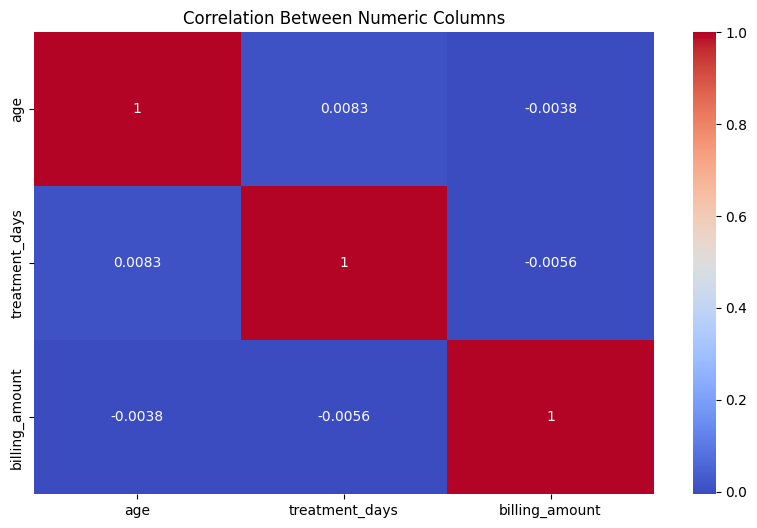

In [ ]:
plt.figure(figsize=(10, 6))
num_cols = ["age", "treatment_days", "billing_amount"]
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Columns")

## Categorical Correlation:

need to one hot encode the blood type as it is nominal and not ordinal

implement ML model, LabelEncoder to convert columns to integer code, such as 'gender'

In [ ]:
# Copy only categoricals
df_cat = df[["gender", "blood_type", "admission_type", "test_results"]].copy()

# One-hot encode blood_type
df_cat = pd.get_dummies(df_cat, columns=["blood_type"], drop_first=True)

# Label encode the others
encoder = LabelEncoder()
for col in ["gender", "admission_type", "test_results"]:
    df_cat[col] = encoder.fit_transform(df_cat[col])

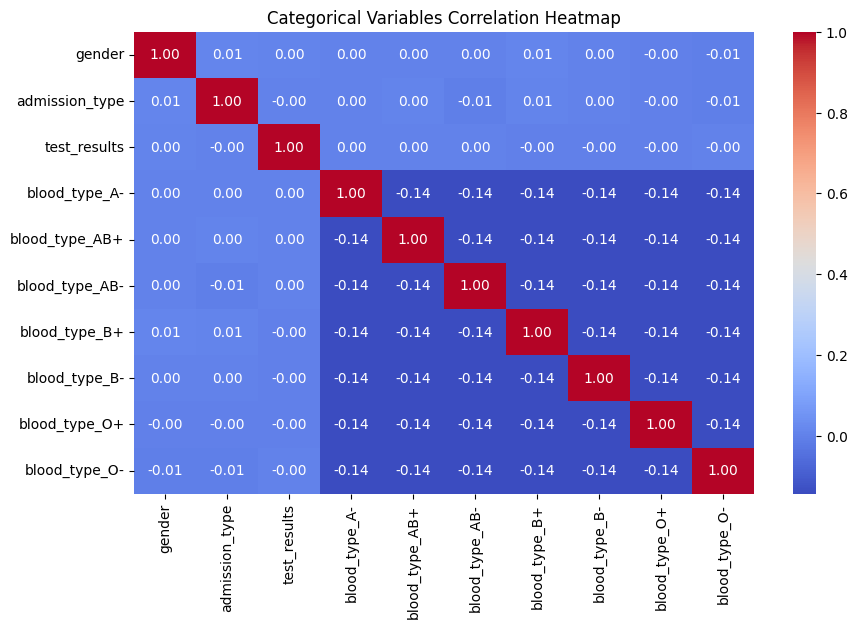

In [ ]:
corr_matrix = df_cat.corr()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Categorical Variables Correlation Heatmap")

## Combined heatmap

In [ ]:
# --- Combine numeric + categorical ---
df_comb = pd.concat([df[num_cols], df_cat], axis=1)

# --- Correlation matrix ---
corr_matrix = df_comb.corr()

Text(0.5, 1.0, 'Combined Correlation Heatmap (Numeric + Categorical Encoded)')

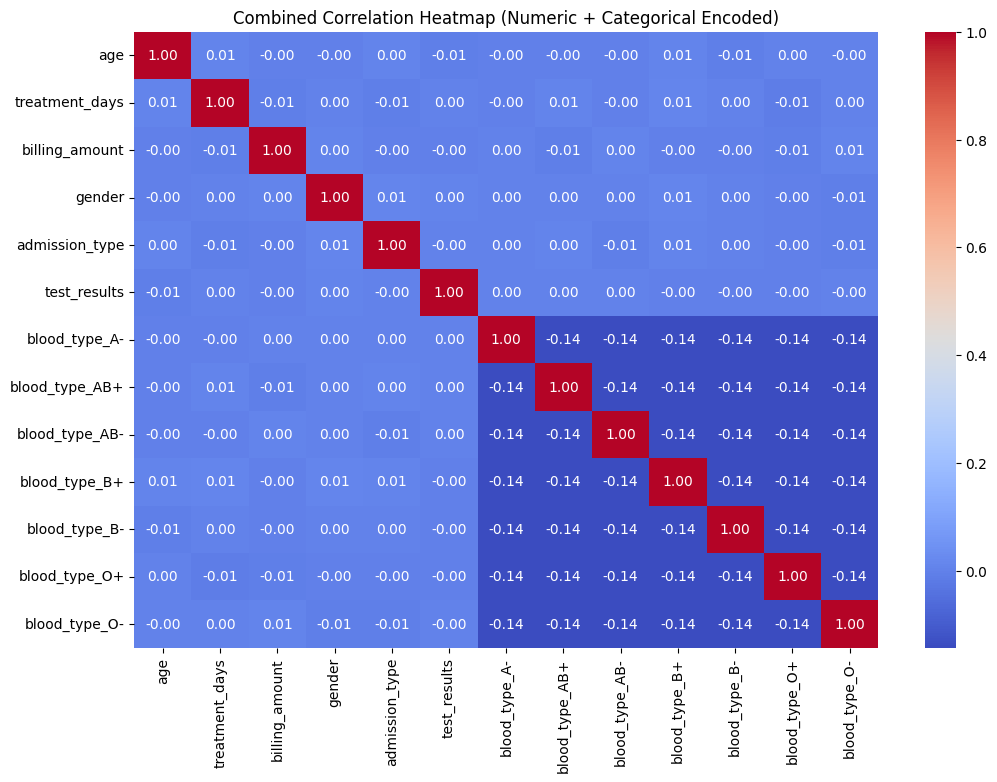

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Combined Correlation Heatmap (Numeric + Categorical Encoded)")

## Distributions

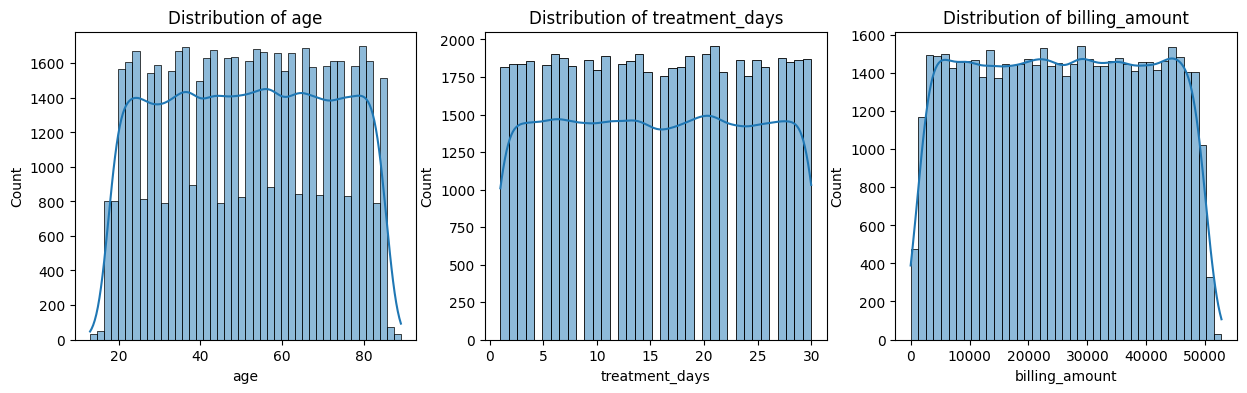

In [ ]:
numeric_cols = ["age", "treatment_days", "billing_amount"]

plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")

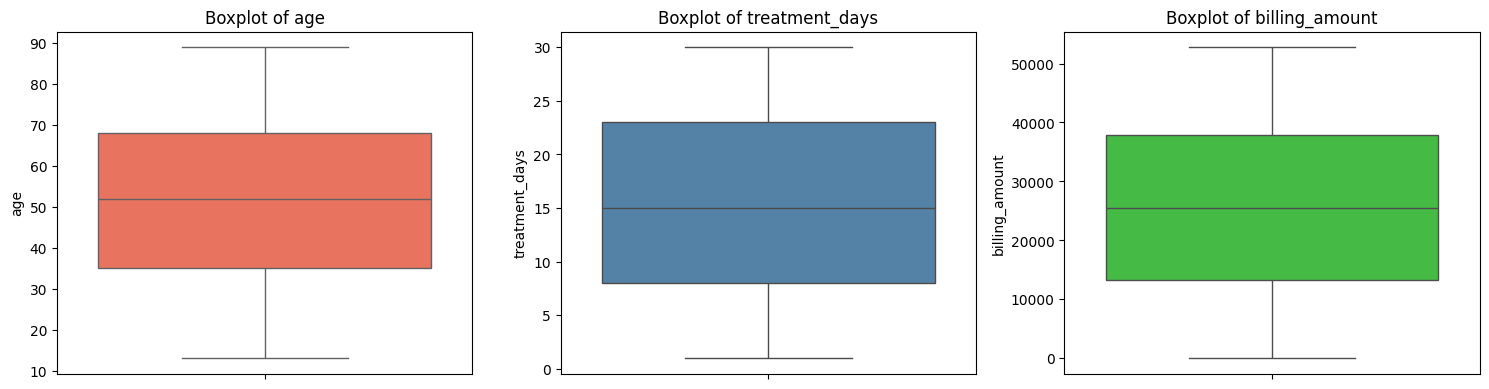

In [ ]:
numeric_cols = ["age", "treatment_days", "billing_amount"]

box_colors = ['#FF6347', '#4682B4', '#32CD32']

plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color=box_colors[i-1])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()

/tmp/ipython-input-3924851266.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette=palette)
/tmp/ipython-input-3924851266.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette=palette)
/tmp/ipython-input-3924851266.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[col], palette=palette)
/tmp/ipython-input-3924851266.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=Fa

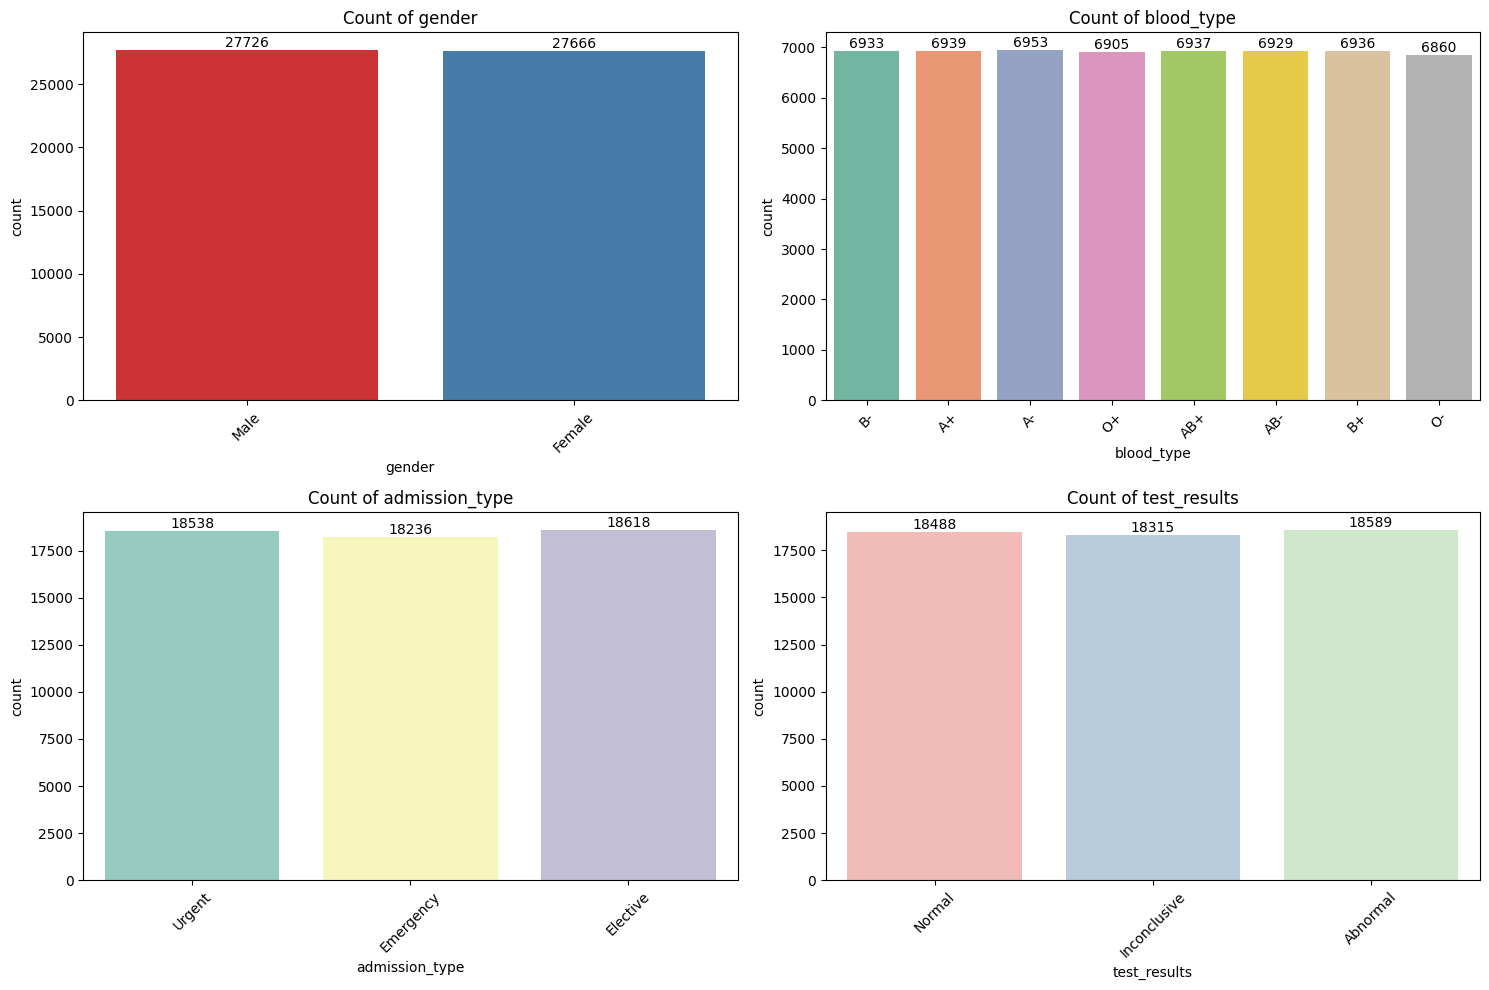

In [ ]:
categorical_cols = ["gender", "blood_type", "admission_type", "test_results"]

# Define a list of color palettes for each plot
palettes = ["Set1", "Set2", "Set3", "Pastel1"]

plt.figure(figsize=(15, 10))

for i, (col, palette) in enumerate(zip(categorical_cols, palettes), 1):
    plt.subplot(2, 2, i)
    ax = sns.countplot(x=df[col], palette=palette)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)

    # Add count labels on top of bars
    for p in ax.patches:
        count = int(p.get_height())
        ax.annotate(count, (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom', fontsize=10)

plt.tight_layout()

/tmp/ipython-input-3527602525.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=avg_billing_gender, x="gender", y="billing_amount", palette=colors)


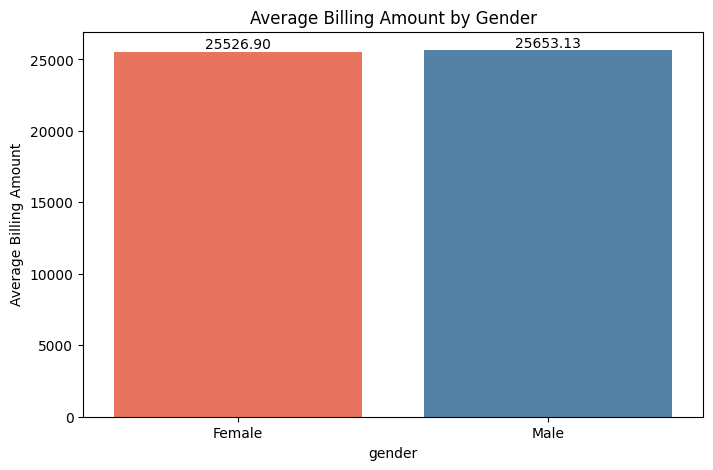

In [ ]:
avg_billing_gender = df.groupby("gender")["billing_amount"].mean().reset_index()

# Define colors for each gender (match order of categories)
colors = ["#FF6347", "#4682B4"]

plt.figure(figsize=(8,5))
ax = sns.barplot(data=avg_billing_gender, x="gender", y="billing_amount", palette=colors)
plt.title("Average Billing Amount by Gender")
plt.ylabel("Average Billing Amount")

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

/tmp/ipython-input-4253787915.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=avg_billing_admission, x="admission_type", y="billing_amount", palette=colors)


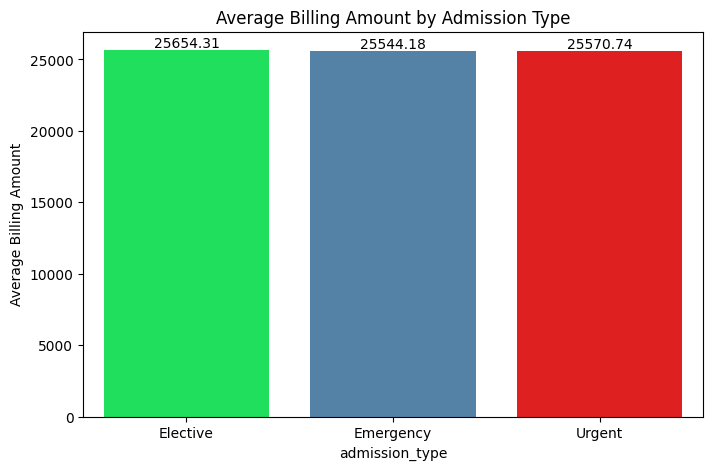

In [ ]:
colors = ["#00FF51", "#4682B4", "#FF0000"]

avg_billing_admission = df.groupby("admission_type")["billing_amount"].mean().reset_index()

plt.figure(figsize=(8,5))
ax = sns.barplot(data=avg_billing_admission, x="admission_type", y="billing_amount", palette=colors)
plt.title("Average Billing Amount by Admission Type")
plt.ylabel("Average Billing Amount")

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')

# Statistical Testing

In [ ]:
# Question: Is there a relationship between age and treatment_days?
#
# Null Hypothesis (H0): There is no correlation between age and treatment duration.
# Alternative Hypothesis (H1): There is a significant correlation between age and treatment duration.

stats.pearsonr(df['age'], df['treatment_days'])

PearsonRResult(statistic=np.float64(0.008347151203424885), pvalue=np.float64(0.04946818764687169))